## Build 3 nodes in sequences , name , age , list of skills , 

### first node should personalise the name field with a greeting 

### decribe the user's age 

### lists the user's skills in a formatted string 

### the final output of result should be combined message  

In [1]:
from typing import TypedDict , List 
from langgraph.graph import StateGraph 

In [19]:
class AgentMultiState(TypedDict) :
    name : str 
    age : str 
    skills : str
    final : str 


In [41]:
def name_node(state : AgentMultiState) -> AgentMultiState:
    """ This node defines the name and greets the user in order to get into the system """
    
    state['final'] = f'{state["name"]} ! , welcome to august os '

    return state

In [42]:
def age_node(state : AgentMultiState) -> AgentMultiState:
    """ This node defines the name and greets the user in order to get into the system and adds the age of that user """
    
    state["final"] = f'{state["final"]}' + f'you are { state["age"]} years old! '

    return state 

In [43]:
def skills_node(state : AgentMultiState) -> AgentMultiState:
    """ This node defines the name and greets the user in order to get into the system and adds age and skills """
    
    state["final"] = f'{state["final"]}' + f'you have skills in {state["skills"]}'


    return state 

In [44]:
graph = StateGraph(AgentMultiState)

graph.add_node("name asked" , name_node)

graph.add_node("age asked", age_node)

graph.add_node("skills asked", skills_node)

graph.set_entry_point("name asked")

graph.add_edge("name asked","age asked")

graph.add_edge("age asked","skills asked")

graph.set_finish_point("skills asked")

app = graph.compile()

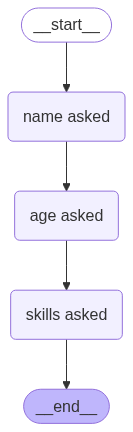

In [45]:
from IPython.display import display , Image

display(Image(app.get_graph().draw_mermaid_png()))

In [46]:
answer = app.invoke({"name" : "august" , "age" : 21 , "skills" : " python , sql , excel , ml , data analytics " })

print ( answer['final'])

august ! , welcome to august os you are 21 years old! you have skills in  python , sql , excel , ml , data analytics 


### made a mistake here which is i forgot to actually return state and yeah i am pretty much am able to make sure that the agent is able to bring back what has been asked in the exercise
